In [22]:
import pandas as pd

# Excel dosyalarını oku
dosya1 = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigmakarşılaştırma.xlsx', sheet_name='sigma3')
dosya2 = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigmakarşılaştırma.xlsx', sheet_name='sigma4')
dosya3 = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigmakarşılaştırma.xlsx', sheet_name='sigma5')

# Her dosyadaki birinci sütunu seç ve ilk 40 karakteri al
sütun1_dosya1 = set(dosya1.iloc[:, 0]) #.astype(str).str[:40]
sütun1_dosya2 = set(dosya2.iloc[:, 0]) #.astype(str).str[:40]
sütun1_dosya3 = dosya3.iloc[:, 0].astype(str).str[:40]

# Eşleşen verileri bul
eşleşen_veriler = set(sütun1_dosya1) & set(sütun1_dosya2) & set(sütun1_dosya3)

# Eşleşen veri sayısını yazdır
print("Eşleşen Veri Sayısı:", len(eşleşen_veriler))

# Eşleşen verileri liste halinde yazdır
print("Eşleşen Veriler:")
print(list(eşleşen_veriler))

Eşleşen Veri Sayısı: 2207
Eşleşen Veriler:
['MASHI_PHR1206-6122_SA100200_id2725', 'StenholmAcker_pn_g065_9+00_5_id518', 'IPHASGTC_We2-5_GT260816_id655', 'StenholmAcker_pn_g351_9+09_0_id1159', 'Kwitter_NGC6879_KP010799_id481', 'StenholmAcker_pn_g149_0+04_4_id682', 'StenholmAcker_pn_g285_4+02_2_id879', 'MASHI_PHR1433-5557_SA220600_id2846', 'StenholmAcker_pn_g316_1+08_4_id980', 'MASHI_PHR1750-3500_MS090702B_id3163', 'StenholmAcker_pn_g298_3-04_8_id923', 'StenholmAcker_pn_g042_5-14_5_id408', 'MASHI_PHR1729-1513_SA200600_id222', 'Boumis0306_PTB40_SK050703_id4270', 'StenholmAcker_pn_g142_1+03_4_id673', 'FRA_KnFe1_KO131215_id10889', 'SAAO2014_K5-22_SA130914_id4146', 'StenholmAcker_pn_g335_4-01_1_id1065', 'StenholmAcker_pn_g359_3-03_1_id1310', 'MASHI_PHR0743-1951_SA010203_id2551', 'StenholmAcker_pn_g342_1+10_8_id1097', 'StenholmAcker_pn_g357_6-03_3_id1256', 'MASHI_NGC5189_SA130204_id944', 'MASHI_PHR1811-2922_FL070799LD_id2148', 'StenholmAcker_pn_g358_5+02_6_id1279', 'StenholmAcker_pn_g355_9-04

In [33]:
import pandas as pd

# Eşleşen verileri liste haline getir
eşleşen_veriler_liste = list(eşleşen_veriler)

# Excel dosyalarını oku
dosya1 = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigmakarşılaştırma.xlsx', sheet_name='sigma3')
dosya2 = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigmakarşılaştırma.xlsx', sheet_name='sigma4')
dosya3 = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigmakarşılaştırma.xlsx', sheet_name='sigma5')

# Eşleşen verilerin birinci sütunlarını seç
eşleşen_dosya1 = dosya1[dosya1.iloc[:, 0].isin(eşleşen_veriler_liste)]
eşleşen_dosya2 = dosya2[dosya2.iloc[:, 0].isin(eşleşen_veriler_liste)]
eşleşen_dosya3 = dosya3[dosya3.iloc[:, 0].isin(eşleşen_veriler_liste)]

# Karşılaştırma sayfasını oluştur
karşılaştırma_tablo = pd.DataFrame({'Eşleşen Veri': eşleşen_veriler_liste})

# Sigma3, Sigma4 ve Sigma5 sayfalarından değerleri çekip karşılaştırma sayfasına ekle
for dosya, sütun_adı in zip([dosya1, dosya2, dosya3], ['Dosya 1 Değer', 'Dosya 2 Değer', 'Dosya 3 Değer']):
    for indeks, satır in eşleşen_dosya1.iterrows():
        eşleşen_veri = satır.iloc[0]
        değer = dosya.loc[dosya.iloc[:, 0] == eşleşen_veri, '[OIII] temperature'].values
        karşılaştırma_tablo.loc[karşılaştırma_tablo['Eşleşen Veri'] == eşleşen_veri, sütun_adı] = değer

# Çıktıyı Excel dosyasına yaz
with pd.ExcelWriter('/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigmakarşılaştırma.xlsx', engine='openpyxl', mode='a') as writer:
    karşılaştırma_tablo.to_excel(writer, sheet_name='karşılaştır', index=False)


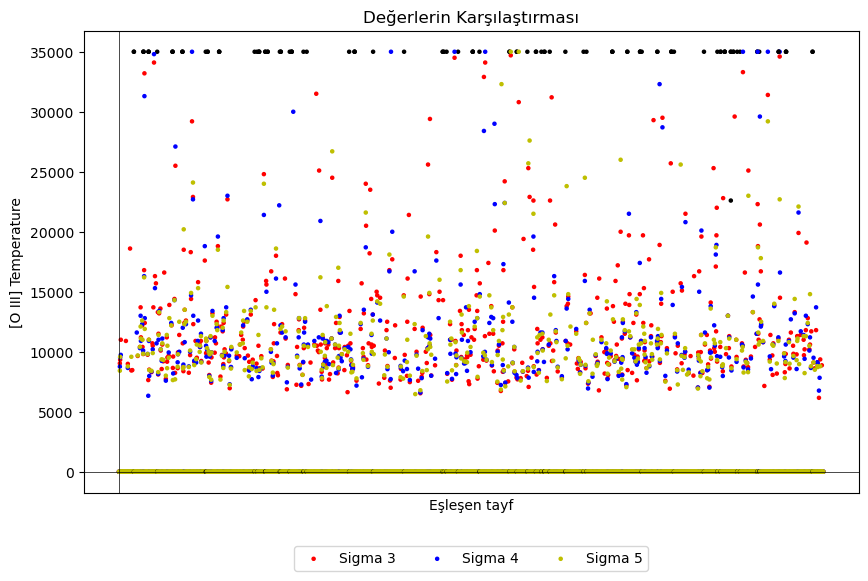

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını oku
dosya = pd.read_excel('/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigmakarşılaştırma.xlsx', sheet_name='karşılaştır')

# Grafiği oluştur
plt.figure(figsize=(10, 6))

# Değerlere göre renkleri belirle
renkler = dosya['Dosya 1 Değer'].apply(lambda x: 'k' if x == 35000 else 'r')
plt.scatter(dosya['Eşleşen Veri'], dosya['Dosya 1 Değer'], color=renkler, label='Sigma 3', s=5)

renkler = dosya['Dosya 1 Değer'].apply(lambda x: 'k' if x == 35000 else 'b')
plt.scatter(dosya['Eşleşen Veri'], dosya['Dosya 2 Değer'], color=renkler, label='Sigma 4', s=5)

renkler = dosya['Dosya 1 Değer'].apply(lambda x: 'k' if x == 35000 else 'y')
plt.scatter(dosya['Eşleşen Veri'], dosya['Dosya 3 Değer'], color=renkler, label='Sigma 5', s=5)

# Ekseni düzenle
plt.xlabel('Eşleşen tayf')
plt.ylabel('[O III] Temperature')

# X eksenindeki isimleri kaldır
plt.xticks([])

# Eksenleri sıfırla
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Grafik başlığı ve legend ekle (legend, grafiğin dışında ve altında olacak şekilde)
plt.title('Değerlerin Karşılaştırması')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=3)

# Grafiği kaydet (PNG formatında, DPI değeri 300)
plt.savefig('/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/karsilastirma_grafik.png', dpi=300, bbox_inches='tight')

# Grafiği göster
plt.show()


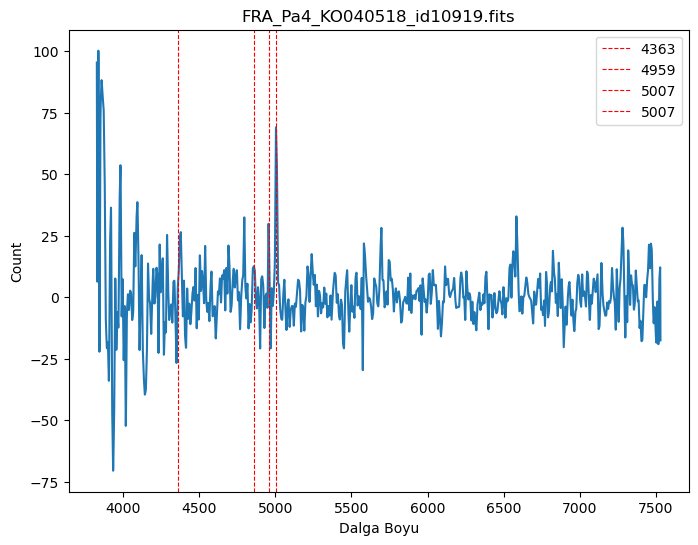

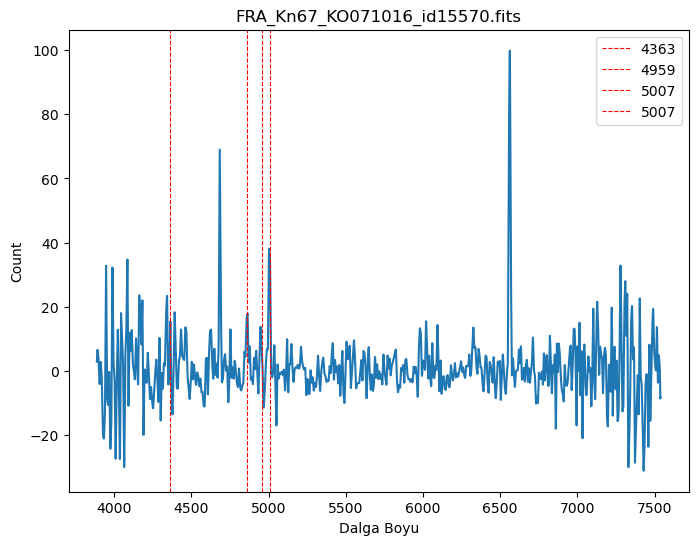

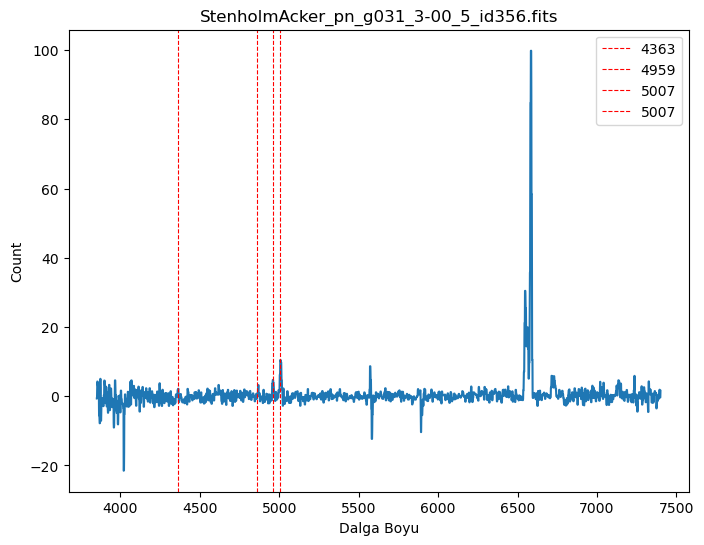

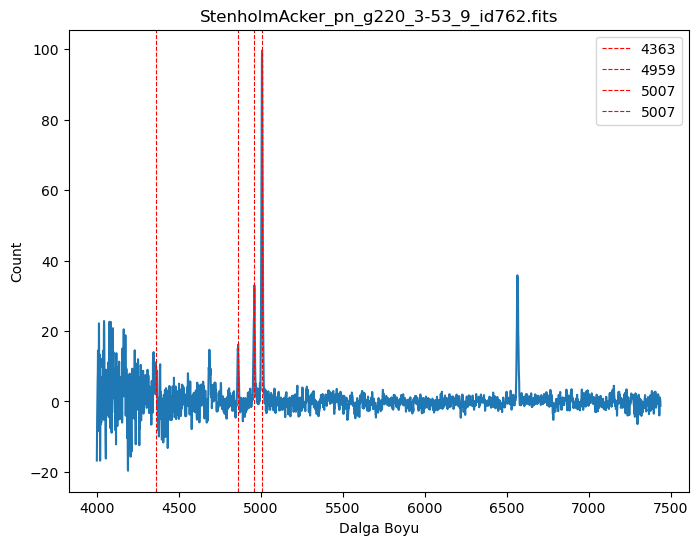

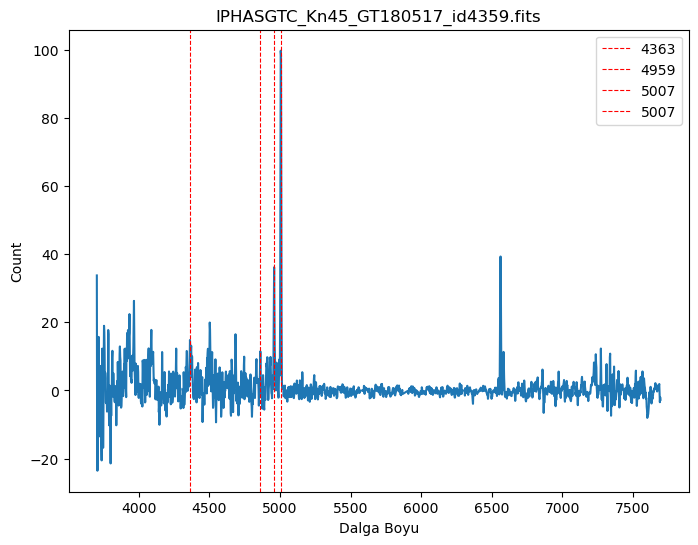

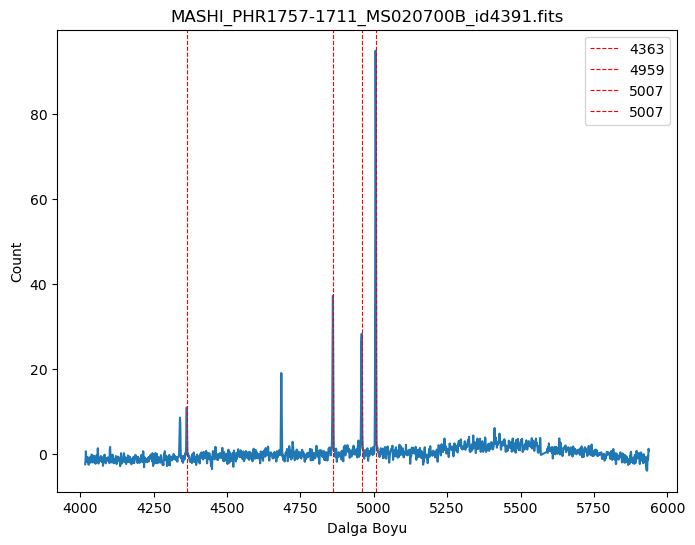

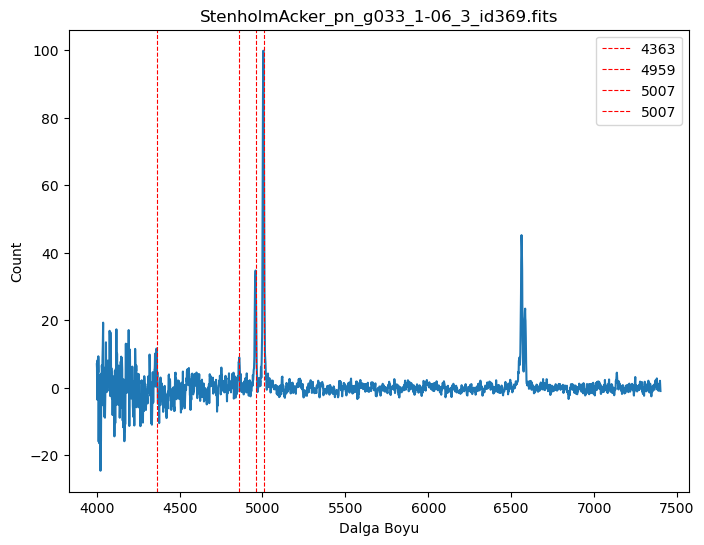

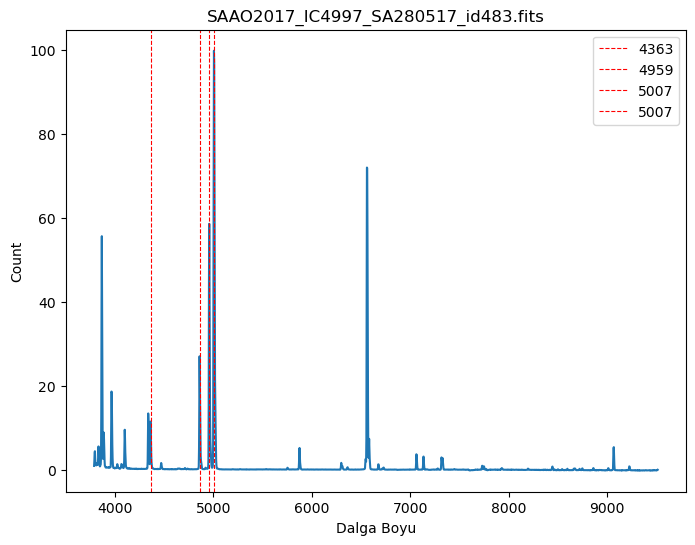

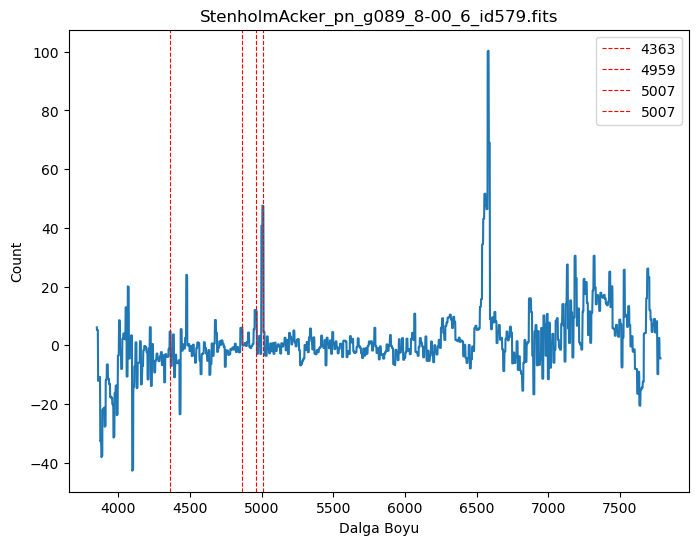

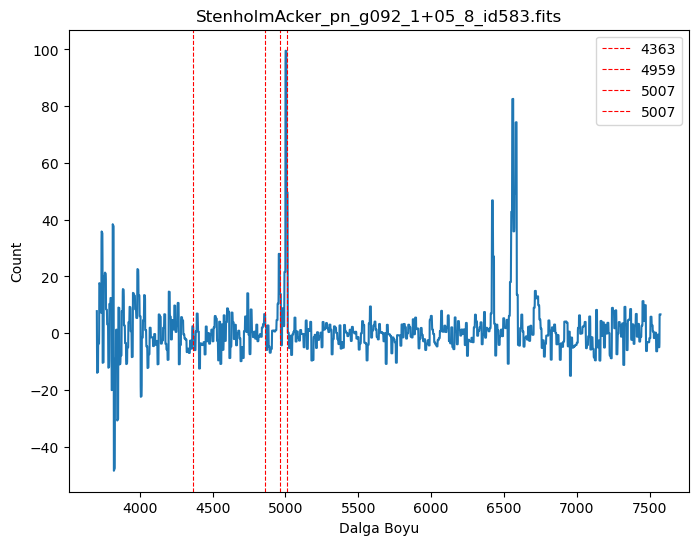

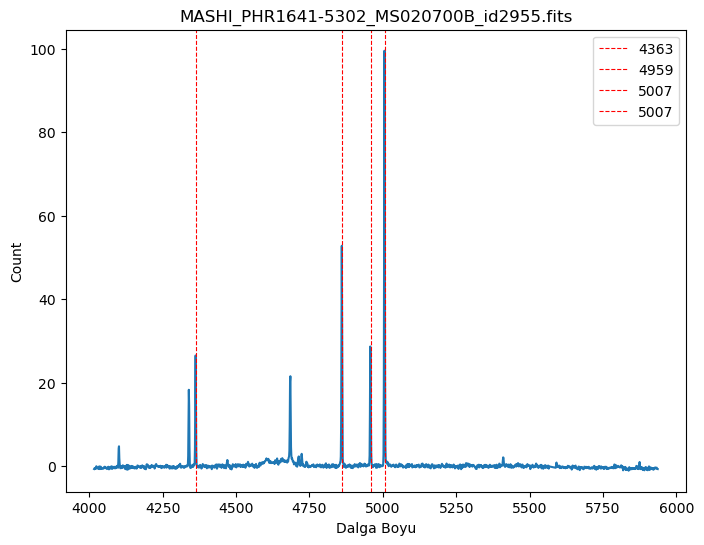

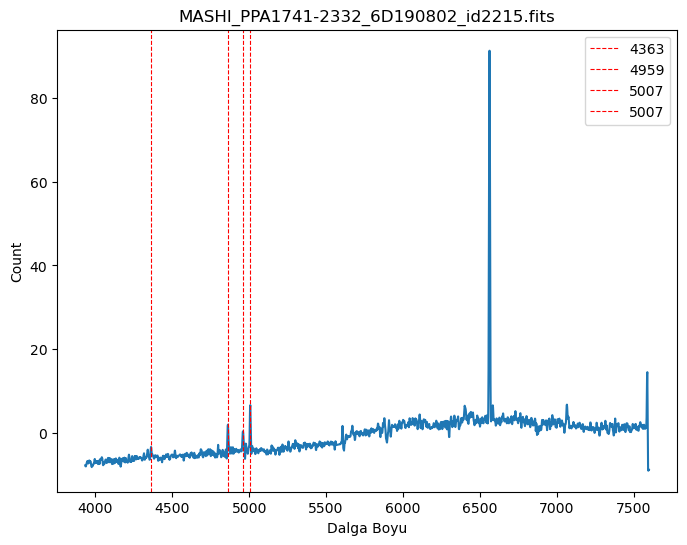

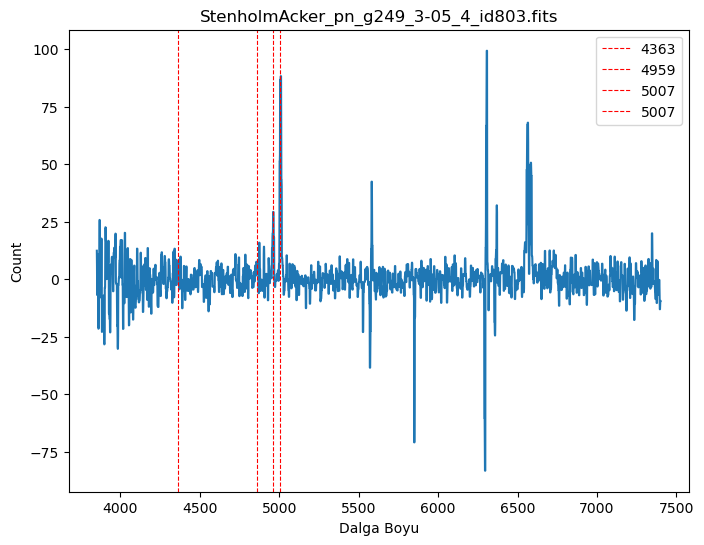

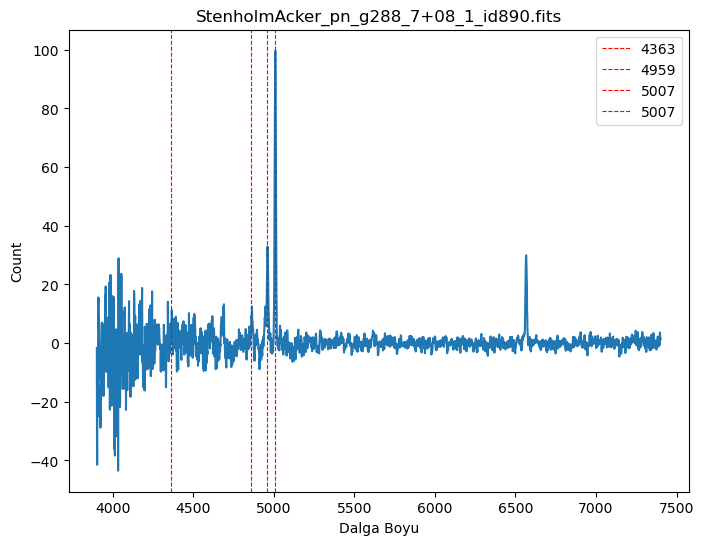

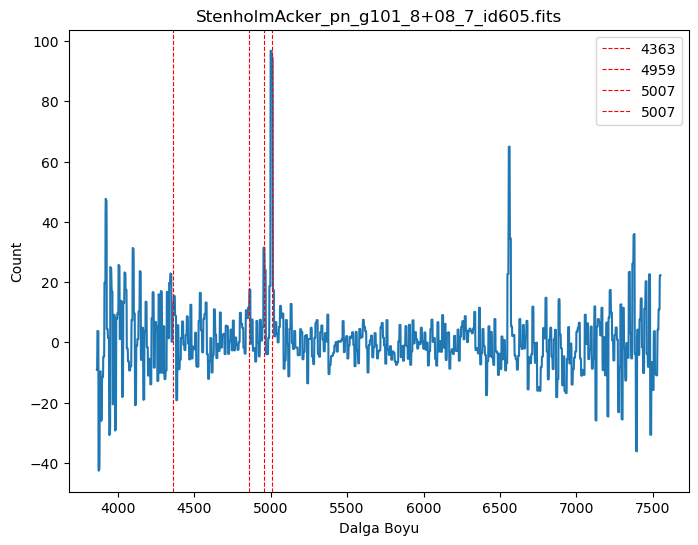

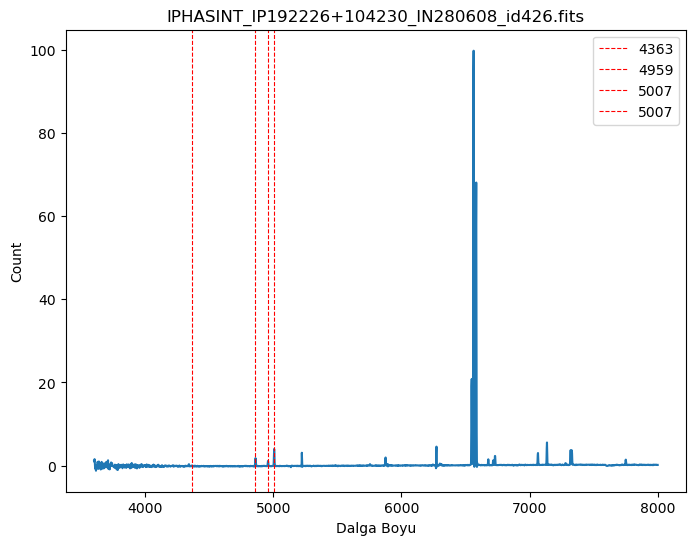

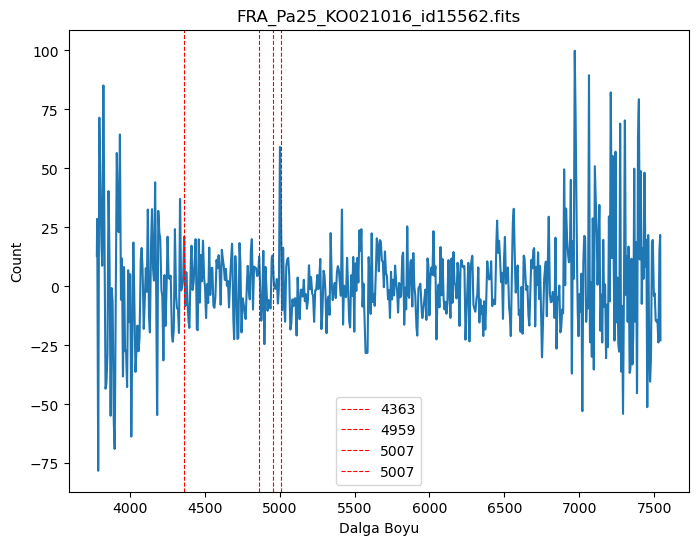

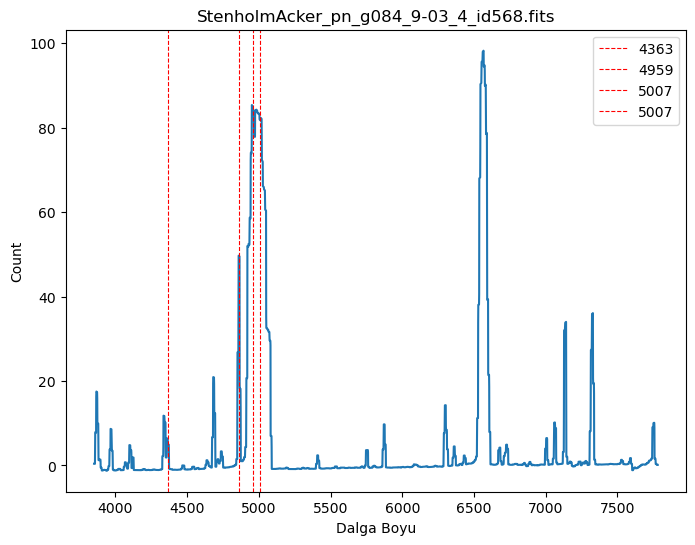

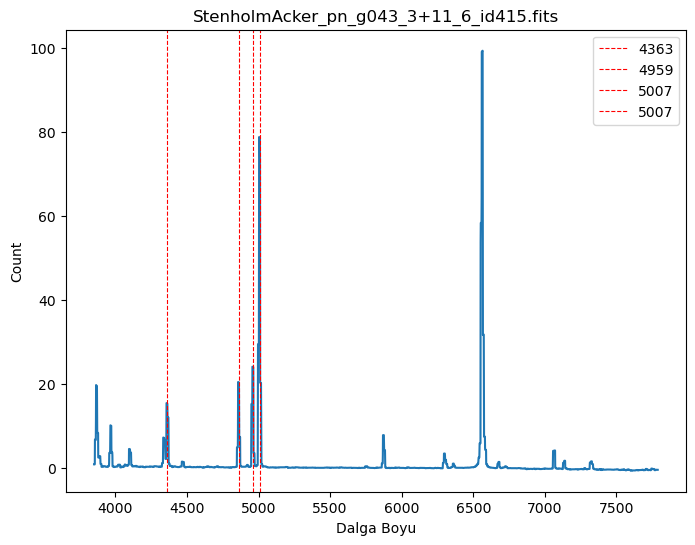

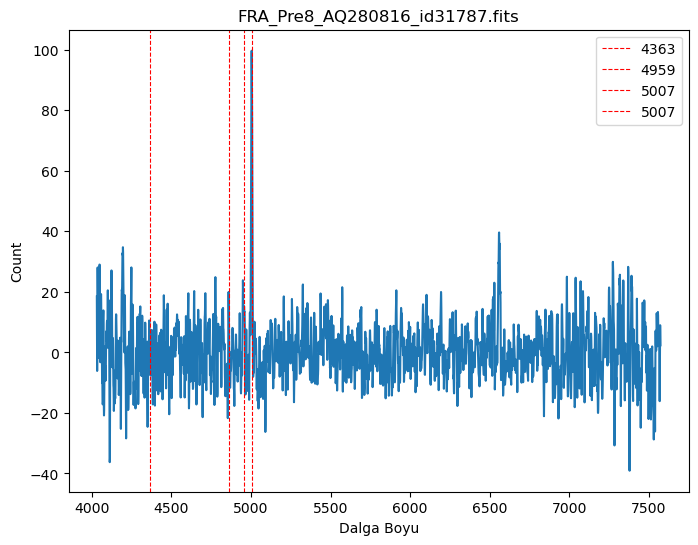

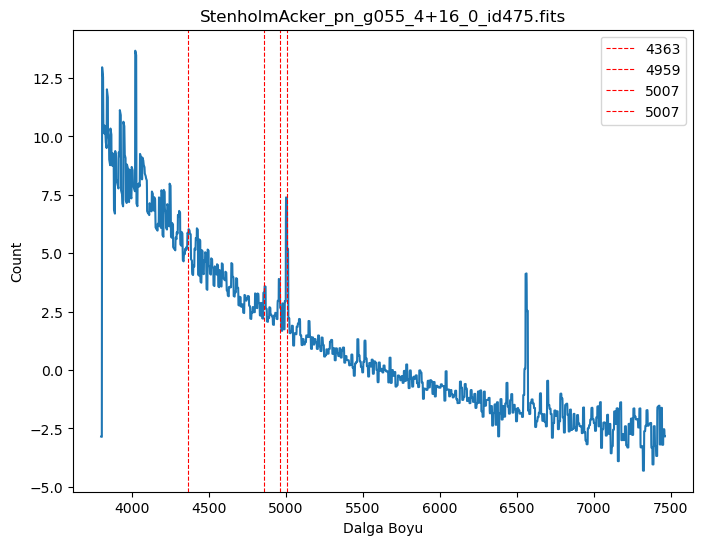

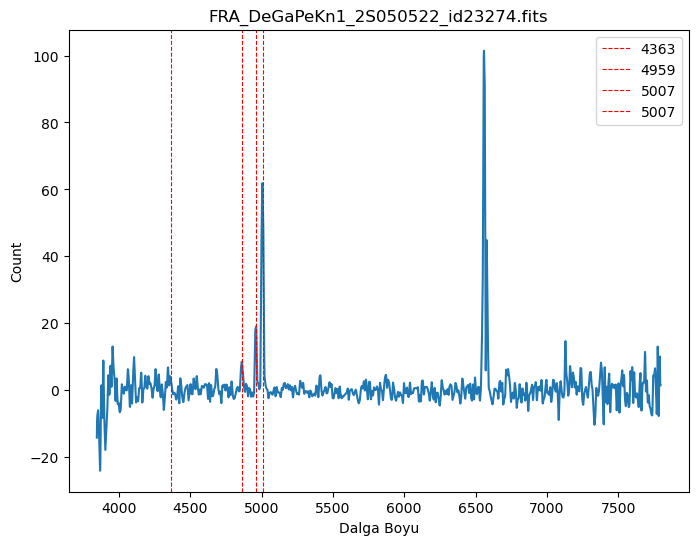

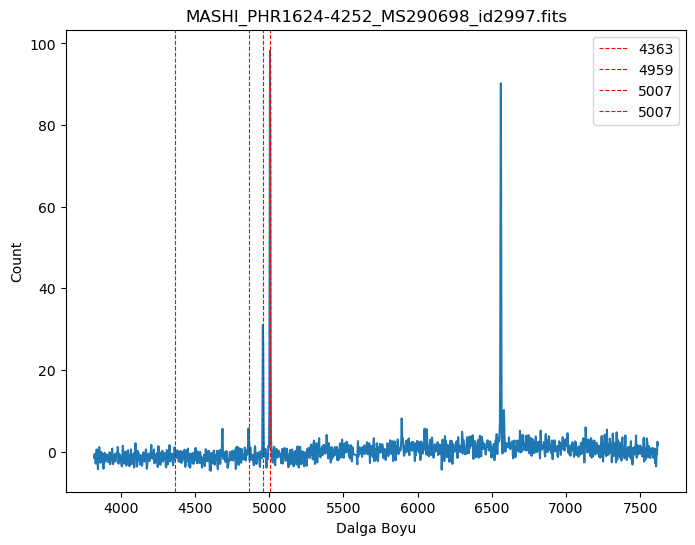

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ana klasör yolu
ana_klasor = '/Users/nurullah/Desktop/galaxy_abudance/Uzak_Pc/GPNE/'

# Belirtilen dosyaların adları
dosya_listesi = [
    'FRA_Pa4_KO040518_id10919',
    'FRA_Kn67_KO071016_id15570',
    'StenholmAcker_pn_g031_3-00_5_id356',
    'StenholmAcker_pn_g220_3-53_9_id762',
    'IPHASGTC_Kn45_GT180517_id4359',
    'MASHI_PHR1757-1711_MS020700B_id4391',
    'StenholmAcker_pn_g033_1-06_3_id369',
    'SAAO2017_IC4997_SA280517_id483',
    'StenholmAcker_pn_g089_8-00_6_id579',
    'StenholmAcker_pn_g092_1+05_8_id583',
    'MASHI_PHR1641-5302_MS020700B_id2955',
    'MASHI_PPA1741-2332_6D190802_id2215',
    'StenholmAcker_pn_g249_3-05_4_id803',
    'StenholmAcker_pn_g288_7+08_1_id890',
    'StenholmAcker_pn_g101_8+08_7_id605',
    'IPHASINT_IP192226+104230_IN280608_id426',
    'FRA_Pa25_KO021016_id15562',
    'StenholmAcker_pn_g084_9-03_4_id568',
    'StenholmAcker_pn_g043_3+11_6_id415',
    'FRA_Pre8_AQ280816_id31787',
    'StenholmAcker_pn_g055_4+16_0_id475',
    'FRA_DeGaPeKn1_2S050522_id23274',
    'MASHI_PHR1624-4252_MS290698_id2997'
]

# Her bir dosya için
for dosya_adı in dosya_listesi:
    # Dosyanın adının sonuna ".csv" ekleyerek dosya adını oluştur
    dosya_adı_csv = dosya_adı + '.csv'

    # Dosyanın bulunduğu alt klasörü bul
    alt_klasor = next((klasor for klasor, _, dosyalar in os.walk(ana_klasor) if dosya_adı_csv in dosyalar), None)

    # Alt klasör bulunamadıysa devam et
    if alt_klasor is None:
        print(f"{dosya_adı_csv} için alt klasör bulunamadı.")
        continue

    # CSV dosyasını oku
    csv_dosya_yolu = os.path.join(alt_klasor, dosya_adı_csv)
    df = pd.read_csv(csv_dosya_yolu)

    # Çizim yap
    plt.figure(figsize=(8, 6))
    plt.plot(df.iloc[:, 0], df.iloc[:, 1])
    
    # X ekseninde kırmızı çizgi çek
    plt.axvline(x=4363, color='red', linestyle='--', linewidth=0.8, label='4363')
    plt.axvline(x=4959, color='red', linestyle='--', linewidth=0.8, label='4959')
    plt.axvline(x=5007, color='red', linestyle='--', linewidth=0.8, label='5007')
    plt.axvline(x=4861, color='red', linestyle='--', linewidth=0.8, label='5007')
    
    plt.title(f"{dosya_adı}.fits")
    plt.xlabel('Dalga Boyu')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


In [81]:
import pandas as pd
import os

# Hedef Excel dosyasının adını belirtin
excel_adı = '/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sonuclar.xlsx'

# Excel dosyasını oluşturun ve başlık ekleyin
df = pd.DataFrame(columns=['Dosya Adı', '4363.21_3', '4363.21_4', '4958.91_3', '4958.91_4', '5006.84_3', '5006.84_4'])

# Kaynak dizini belirtin
kaynak_dizin = '/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigma5/lines/'

dosya_listesi = [
    'FRA_Pa4_KO040518_id10919.fits_lines',
    'FRA_Kn67_KO071016_id15570.fits_lines',
    'StenholmAcker_pn_g031_3-00_5_id356.fits_lines',
    'StenholmAcker_pn_g220_3-53_9_id762.fits_lines',
    'IPHASGTC_Kn45_GT180517_id4359.fits_lines',
    'MASHI_PHR1757-1711_MS020700B_id4391.fits_lines',
    'StenholmAcker_pn_g033_1-06_3_id369.fits_lines',
    'SAAO2017_IC4997_SA280517_id483.fits_lines',
    'StenholmAcker_pn_g089_8-00_6_id579.fits_lines',
    'StenholmAcker_pn_g092_1+05_8_id583.fits_lines',
    'MASHI_PHR1641-5302_MS020700B_id2955.fits_lines',
    'MASHI_PPA1741-2332_6D190802_id2215.fits_lines',
    'StenholmAcker_pn_g249_3-05_4_id803.fits_lines',
    'StenholmAcker_pn_g288_7+08_1_id890.fits_lines',
    'StenholmAcker_pn_g101_8+08_7_id605.fits_lines',
    'IPHASINT_IP192226+104230_IN280608_id426.fits_lines',
    'FRA_Pa25_KO021016_id15562.fits_lines',
    'StenholmAcker_pn_g084_9-03_4_id568.fits_lines',
    'StenholmAcker_pn_g043_3+11_6_id415.fits_lines',
    'FRA_Pre8_AQ280816_id31787.fits_lines',
    'StenholmAcker_pn_g055_4+16_0_id475.fits_lines',
    'FRA_DeGaPeKn1_2S050522_id23274.fits_lines',
    'MASHI_PHR1624-4252_MS290698_id2997.fits_lines'
]

# Her dosyayı işle
for dosya in dosya_listesi:
    dosya_yolu = os.path.join(kaynak_dizin, dosya)
    df.at[dosya, 'Dosya Adı'] = dosya

    with open(dosya_yolu, 'r') as f:
        for satır in f:
            sütunlar = satır.split()
            if len(sütunlar) >= 4:
                if sütunlar[1] == '4363.21':
                    df.at[dosya, '4363.21_3'] = sütunlar[2]
                    df.at[dosya, '4363.21_4'] = sütunlar[3]
                elif sütunlar[1] == '4958.91':
                    df.at[dosya, '4958.91_3'] = sütunlar[2]
                    df.at[dosya, '4958.91_4'] = sütunlar[3]
                elif sütunlar[1] == '5006.84':
                    df.at[dosya, '5006.84_3'] = sütunlar[2]
                    df.at[dosya, '5006.84_4'] = sütunlar[3]

# Excel dosyasını kaydet
df.to_excel(excel_adı, index=False)

print(f"Veriler '{excel_adı}' dosyasına kaydedildi.")


Veriler '/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sonuclar.xlsx' dosyasına kaydedildi.


In [82]:
from astropy.io import fits
import numpy as np

# FITS dosyasını aç
dosya_yolu = '/Users/nurullah/Desktop/galaxy_abudance/sigma_karşılaştırma/sigma5/neat_out/6dF_Aug2003_ESO393-16_6D210803_id1196.fits_lines.fits'
hdulist = fits.open(dosya_yolu)

# Tayf verilerini al
veri = hdulist[0].data

# Sinyal-gürültü oranını hesapla
sinyal_gurultu_orani = np.mean(veri) / np.std(veri)

# FITS dosyasını kapat
hdulist.close()

print(f"Sinyal-Gürültü Oranı: {sinyal_gurultu_orani}")


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'